# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
cities_df = pd.read_csv("../cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

cities_df.head(3)

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.5,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.8,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.2,2.37


## Generate Cities List

In [40]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [41]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [42]:
# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [43]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL and request your results in Celsius
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [44]:
# List for holding temperature of each city
temp = []
humidity = []
cloudiness = []
windspeed = []
lat = []
city_name = []

# Loop through the list of cities and perform a request for data on each, while keeping count of the city number
for n, city in enumerate(cities, 1):
    
    # Get weather data
    weather_response = requests.get(query_url + city)
    weather_json = weather_response.json()
       
    # Get weather info from JSON response and add to the list -- LOOK BACK AT TRY/EXCEPT
    try:    
        temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        windspeed.append(weather_json['wind']['speed'])
        lat.append(weather_json['coord']['lat'])       
        city_name.append(city)
        # print log of each city as it's being processed (city number and city name).
        print(f"[{n}]: {city.title()} processed.")
        
    except:
        # Skip over to the new city while counting city
        print(f"[{n}]: City not found.")
        pass
    

[1]: Busselton processed.
[2]: Diapaga processed.
[3]: Atuona processed.
[4]: East London processed.
[5]: Chuy processed.
[6]: Mataura processed.
[7]: Ushuaia processed.
[8]: Yar-Sale processed.
[9]: Meadow Lake processed.
[10]: City not found.
[11]: Port Lincoln processed.
[12]: Khasan processed.
[13]: Jamestown processed.
[14]: Camacha processed.
[15]: Kaitangata processed.
[16]: Vila Franca Do Campo processed.
[17]: Yellowknife processed.
[18]: City not found.
[19]: Geraldton processed.
[20]: Chuchkovo processed.
[21]: Rikitea processed.
[22]: Saryg-Sep processed.
[23]: Sola processed.
[24]: New Norfolk processed.
[25]: Vaini processed.
[26]: Kapaa processed.
[27]: Kodiak processed.
[28]: Lagoa processed.
[29]: Tucuman processed.
[30]: Carauari processed.
[31]: Hermanus processed.
[32]: Ancud processed.
[33]: Thompson processed.
[34]: Muravlenko processed.
[35]: City not found.
[36]: Albany processed.
[37]: Saldanha processed.
[38]: Qaqortoq processed.
[39]: Sept-Iles processed.
[40

[312]: Paamiut processed.
[313]: Balkhash processed.
[314]: Milkovo processed.
[315]: Tucuma processed.
[316]: Takoradi processed.
[317]: Knysna processed.
[318]: Leningradskiy processed.
[319]: Carepa processed.
[320]: Karratha processed.
[321]: Akureyri processed.
[322]: Volksrust processed.
[323]: Sinazongwe processed.
[324]: Shakawe processed.
[325]: Lubao processed.
[326]: City not found.
[327]: Walldurn processed.
[328]: Vao processed.
[329]: Peterhead processed.
[330]: Tual processed.
[331]: Yamada processed.
[332]: Sur processed.
[333]: Gurlan processed.
[334]: Pontes E Lacerda processed.
[335]: Vanavara processed.
[336]: City not found.
[337]: Tambacounda processed.
[338]: Teluknaga processed.
[339]: Labinsk processed.
[340]: Loukhi processed.
[341]: Lata processed.
[342]: Provideniya processed.
[343]: Talnakh processed.
[344]: Nelson Bay processed.
[345]: Baytown processed.
[346]: City not found.
[347]: Nome processed.
[348]: Bathsheba processed.
[349]: Ranong processed.
[350

In [46]:
# Checking how many city samples in total
len(temp)

548

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [49]:
cities_api_data_df = pd.DataFrame({
    "City": city_name,
    "Latitude": lat,
    "Max Temperature (F)": temp,
    "Humidity (%)": humidity,
    "Cloudiness (%)": cloudiness,
    "Wind Speed (mph)": windspeed
    })

# Save Data to csv
cities_api_data_df.to_csv("City_Data.csv")
cities_api_data_df.head()

,City,Latitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,busselton,-33.65,57.00,48,33,20.00
1,diapaga,12.07,81.72,64,19,5.68
2,atuona,-9.80,79.70,72,0,17.74
3,east london,-33.02,63.90,37,0,6.91
4,chuy,-33.70,64.69,95,100,7.56


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [50]:
### USE THE STUFF HERE FOR GOING FORWARD WITH THE REST OF THE HW
humidity100_df = cities_api_data_df.loc[cities_api_data_df['Humidity (%)'] > 100, :]
humidity100_df.head(3)

,City,Latitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


In [51]:
#  Get the indices of cities that have humidity over 100%.
# https://stackoverflow.com/questions/41217310/get-index-of-a-row-of-a-pandas-dataframe-as-an-integer/42853445
humidity100_index = cities_api_data_df.loc[cities_api_data_df['Humidity (%)'] > 100, :].index.values.astype(int)
humidity100_index

array([], dtype=int32)

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [31]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv

,City,Latitude,Temperature,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,jamestown,42.10,69.98,78,90,8.05
1,narsaq,60.92,51.80,66,54,6.93
2,semnan,35.57,85.50,13,0,2.91
3,ushuaia,-54.80,32.00,83,0,3.36
4,meulaboh,4.14,81.32,76,100,3.24
...,...,...,...,...,...,...
536,college,64.86,50.97,81,75,10.29
537,lahaina,20.88,80.42,58,75,14.99
538,parry sound,45.35,69.01,73,100,1.43
539,changqing,36.56,84.99,62,100,1.01


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

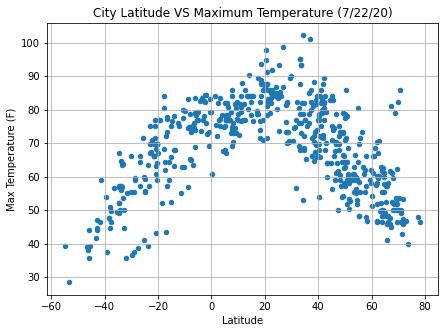

In [67]:
cities_api_data_df.plot(kind='scatter', x='Latitude', y='Max Temperature (F)', title='City Latitude VS Maximum Temperature (7/22/20)', grid=True, figsize=(7,5))
plt.savefig("Output Image/latitude_maxT.png")
plt.show()

## Latitude vs. Humidity Plot

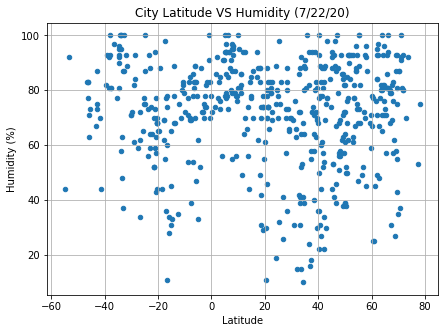

In [68]:
cities_api_data_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', title='City Latitude VS Humidity (7/22/20)', grid=True, figsize=(7,5))
plt.savefig("Output Image/latitude_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

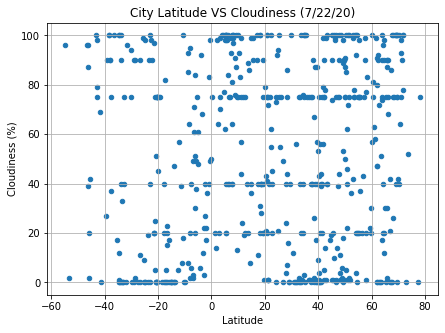

In [69]:
cities_api_data_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', title='City Latitude VS Cloudiness (7/22/20)', grid=True, figsize=(7,5))
plt.savefig("Output Image/latitude_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

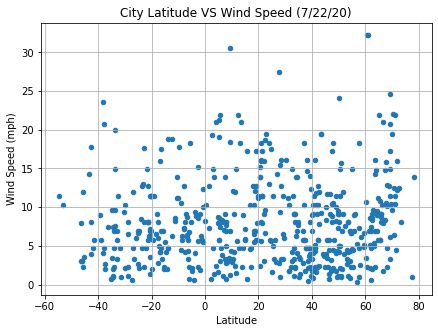

In [70]:
cities_api_data_df.plot(kind='scatter', x='Latitude', y='Wind Speed (mph)', title='City Latitude VS Wind Speed (7/22/20)', grid=True, figsize=(7,5))
plt.savefig("Output Image/latitude_windspeed.png")
plt.show()

## Linear Regression

In [82]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem_df = cities_api_data_df.loc[cities_api_data_df['Latitude'] >= 0, :]
southern_hem_df = cities_api_data_df.loc[cities_api_data_df['Latitude'] < 0, :]
cities_api_data_df

In [143]:
# OPTIONAL: Create a function to create Linear Regression plots
def plotweather(df,y, hem):
    # Scatter plot
    plt.xlabel('Latitude')
    plt.ylabel(y)
    plt.title(f'{hem} Hemisphere - {y} vs. Latitude (7/22/20)')
    x = df['Latitude']
    y = df[y]
    plt.scatter(x, y)
    
    # Add linear regression line
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept
    plt.plot(x,regress,"r-")
    print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.49124390176391053


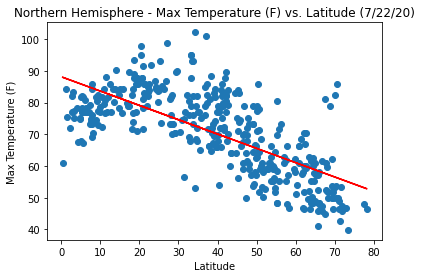

In [144]:
y = 'Max Temperature (F)'
hem = 'Northern'
plotweather(northern_hem_df, y, hem)
    
# Save the plot as png file
plt.savefig(f"Output Image/{hem} Hemisphere - {y} vs. Latitude.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6575019722431825


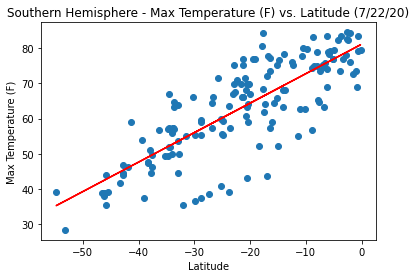

In [145]:
y = 'Max Temperature (F)'
hem = 'Southern'
plotweather(southern_hem_df, y, hem)

# Save the plot as png file
plt.savefig(f"Output Image/{hem} Hemisphere - {y} vs. Latitude.png")

plt.show()

The linear regression models the correlation between latitude and maximum temperature in the northern and southern hemispheres. 

The model for the northern hemisphere illustrates a negative correlation between the latitude and the maximum tempeature. As the latitude increases, the maximum temperature decreases.

The model for the southern hemisphere illustrates a positive correlation between the latitude and the maximum tempeature. As the latitude increases, the maximum temperature also increases. The r-squared of ~0.658 indicates a stronger correlation, compared to the norther hemisphere model (r-squared of ~0.491).

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0033481819552746224


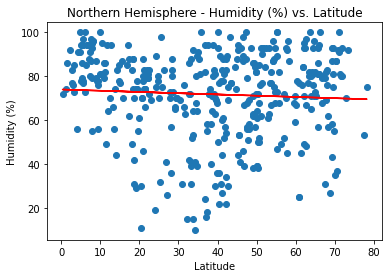

In [130]:
y = 'Humidity (%)'
hem = 'Northern'
plotweather(northern_hem_df, y, hem)

# Save the plot as png file
plt.savefig(f"Output Image/{hem} Hemisphere - {y} vs. Latitude.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.025499798275576746


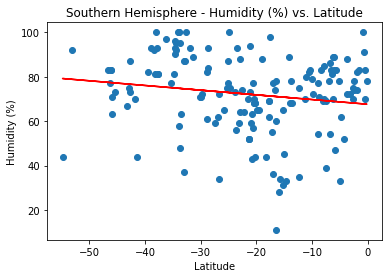

In [131]:
y = 'Humidity (%)'
hem = 'Southern'
plotweather(southern_hem_df, y, hem)

# Save the plot as png file
plt.savefig(f"Output Image/{hem} Hemisphere - {y} vs. Latitude.png")

plt.show()

The linear regression models the correlation between latitude and percentage humdity in the northern and southern hemispheres. 

The model for both the northern and southern hemisphere illustrates that the percentage humidity decreases with an increase in the latitude. The regression indicates a very weak negative correlation between the latitude and the percentage humidity for both models. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0023430509243641093


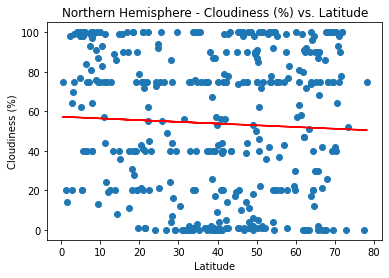

In [132]:
y = 'Cloudiness (%)'
hem = 'Northern'
plotweather(northern_hem_df, y, hem)

# Save the plot as png file
plt.savefig(f"Output Image/{hem} Hemisphere - {y} vs. Latitude.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02978427939445312


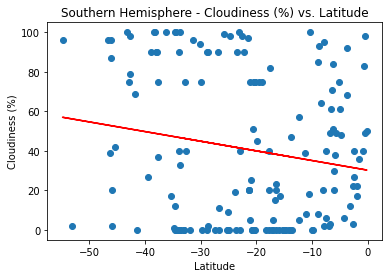

In [133]:
y = 'Cloudiness (%)'
hem = 'Southern'
plotweather(southern_hem_df, y, hem)

# Save the plot as png file
plt.savefig(f"Output Image/{hem} Hemisphere - {y} vs. Latitude.png")

plt.show()

The linear regression models the correlation between latitude and percentage cloudiness in the northern and southern hemispheres. 

The model for the northern hemisphere illustrates that there are almost no correlation between the percentage cloudiness and the latitude, as indicated by the r-squared of almost 0. 

The model for the southern hemisphere, however, illustrates a weak negative correlation between the latitude and the percentage cloudiness. Even though the r-sqared for the model of the southern hemisphere is higher than the model for the northern hemisphere, the correlation is still considered very weak.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0001620296233400881


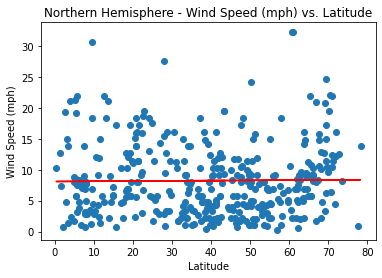

In [134]:
y = 'Wind Speed (mph)'
hem = 'Northern'
plotweather(northern_hem_df, y, hem)

# Save the plot as png file
plt.savefig(f"Output Image/{hem} Hemisphere - {y} vs. Latitude.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00013265476647048144


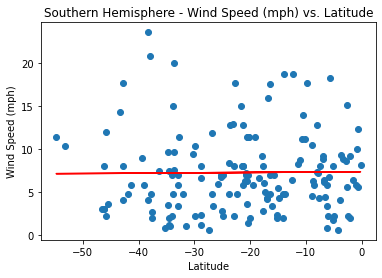

In [135]:
y = 'Wind Speed (mph)'
hem = 'Southern'
plotweather(southern_hem_df, y, hem)

# Save the plot as png file
plt.savefig(f"Output Image/{hem} Hemisphere - {y} vs. Latitude.png")

plt.show()

The linear regression models the correlation between latitude and wind speed in the northern and southern hemispheres.

The models for both the northern and southern hemisphere illustrate that there are almost no correlation between the wind speed and the latitude, as indicated by the r-squared of almost 0.